In [64]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import cross_val_score, ShuffleSplit, StratifiedKFold, cross_val_predict
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
import math
%matplotlib inline

# Instructions
Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. 

# Dataset:
https://www.kaggle.com/marklvl/bike-sharing-dataset    
[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

# Attributes
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


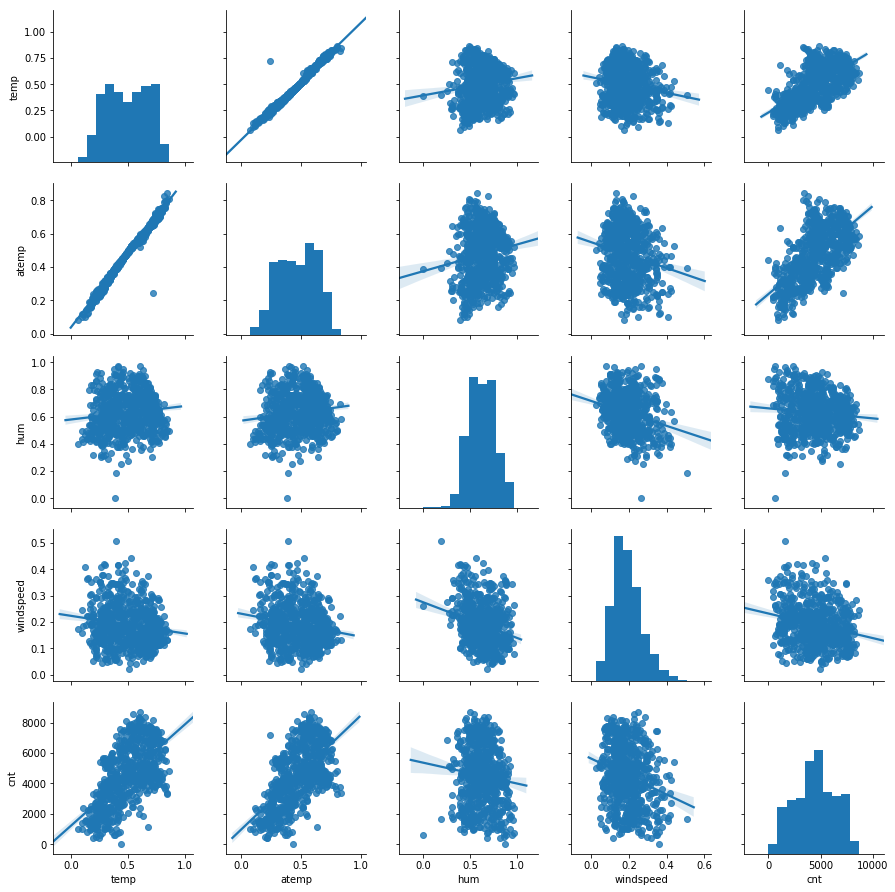

In [4]:
g = sns.PairGrid(df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
g = g.map_diag(plt.hist)
g = g.map_offdiag(sns.regplot)

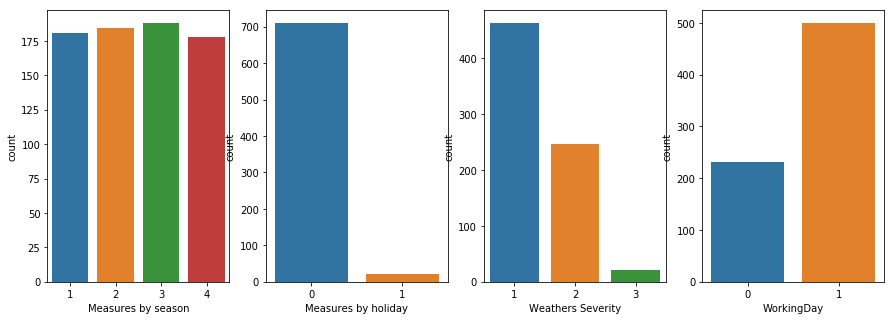

In [5]:
#Check distributions
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.countplot(df.season)
plt.xlabel("Measures by season")
plt.subplot(1,4,2)
sns.countplot(df.holiday)
plt.xlabel("Measures by holiday")
plt.subplot(1,4,3)
sns.countplot(df.weathersit)
plt.xlabel("Weathers Severity")
plt.subplot(1,4,4)
sns.countplot(df.workingday)
plt.xlabel("WorkingDay")
plt.show()

#Good to see we aren't biasing toward types of seasons or weekdays.

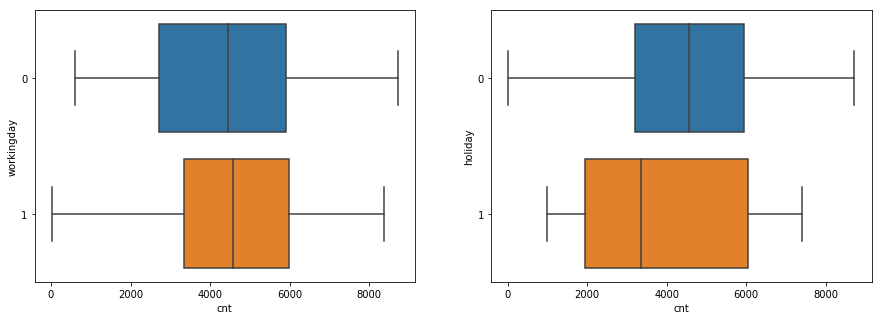

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=df.cnt, y=df.workingday, orient='h')
plt.subplot(1,2,2)
sns.boxplot(x=df.cnt, y=df.holiday, orient='h')
plt.show()

#Neither of these look very meaningful, especially given that there are so few instances of holidays. 

# OLS Regression


Coefficients: 
 [ 6920.56038387 -2518.70858415   123.38489407    71.17401298]

Intercept: 
 1152.8951986846005

R-squared:
0.42833939916419395


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


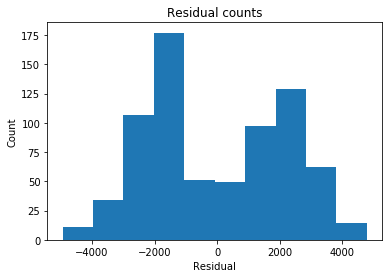

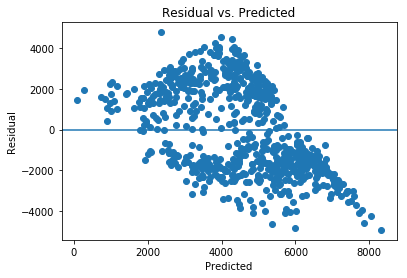

,atemp,windspeed,workingday,mnth
atemp,1.000000,-0.183643,0.052182,0.227459
windspeed,-0.183643,1.000000,-0.018796,-0.207502
workingday,0.052182,-0.018796,1.000000,-0.005901
mnth,0.227459,-0.207502,-0.005901,1.000000


In [73]:
regr = linear_model.LinearRegression()
X = df[['atemp', 'windspeed', 'workingday','mnth']]
Y = df['cnt']
regr.fit(X, Y)
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
predicted = cross_val_predict(regr,X,Y).ravel()
actual = df['cnt']
residual = actual - predicted
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#check scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


#check multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)

In [9]:
#Duplicate the model in statsmodels to check feature p-values
linear_formula = 'cnt ~ atemp+windspeed+workingday+mnth'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)
print(lm.conf_int())

Intercept     1152.895199
atemp         6920.560384
windspeed    -2518.708584
workingday     123.384894
mnth            71.174013
dtype: float64
Intercept     1.673403e-05
atemp         4.928571e-71
windspeed     5.389606e-04
workingday    2.921064e-01
mnth          1.672188e-05
dtype: float64
0.42833939916419395
                      0            1
Intercept    630.608809  1675.181588
atemp       6240.096853  7601.023914
windspeed  -3941.215634 -1096.201534
workingday  -106.377834   353.147622
mnth          38.931870   103.416156


In [108]:
#Working day is not adding value, and month is correlated with temp (somewhat).
#Remove those and add weather severity and humidity:


Coefficients: 
 [ 7220.34228646 -3857.39731559  -464.6201834  -1996.50971819]

Intercept: 
 3716.0355069135103

R-squared:
0.47313512865891616


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


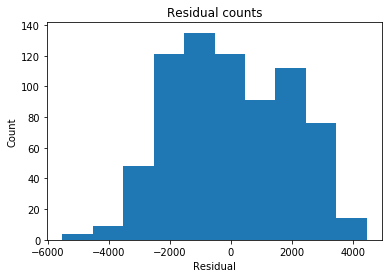

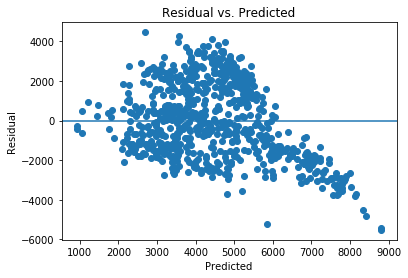

,atemp,windspeed,weathersit,hum
atemp,1.000000,-0.183643,-0.121583,0.139988
windspeed,-0.183643,1.000000,0.039511,-0.248489
weathersit,-0.121583,0.039511,1.000000,0.591045
hum,0.139988,-0.248489,0.591045,1.000000


In [74]:
regr = linear_model.LinearRegression()
X = df[['atemp', 'windspeed', 'weathersit','hum']]
Y = df['cnt']
regr.fit(X, Y)
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
predicted = cross_val_predict(regr,X,Y).ravel()
actual = df['cnt']
residual = actual - predicted
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#check scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


#check multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)

In [11]:
#Duplicate the model in statsmodels to check feature p-values
linear_formula = 'cnt ~ atemp+windspeed+weathersit+hum'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
print("\nparameters\n",lm.params)
print("\np-values\n",lm.pvalues)
print("\nr-squared\n",lm.rsquared)
print("\nconfidence intervals\n",lm.conf_int())


parameters
 Intercept     3716.035507
atemp         7220.342286
windspeed    -3857.397316
weathersit    -464.620183
hum          -1996.509718
dtype: float64

p-values
 Intercept     8.224479e-26
atemp         1.439984e-79
windspeed     1.111412e-07
weathersit    2.318248e-04
hum           6.005362e-05
dtype: float64

r-squared
 0.47313512865891627

confidence intervals
                       0            1
Intercept   3047.997470  4384.073544
atemp       6560.198823  7880.485750
windspeed  -5269.931673 -2444.862958
weathersit  -711.144532  -218.095835
hum        -2967.589658 -1025.429779


In [75]:
X_digits = np.array(X)
Y_digits = np.array(Y)

cv = ShuffleSplit(n_splits=5, test_size=0.1)
scores = cross_val_score(regr, X_digits, Y_digits, scoring="r2", cv=cv,)
print(scores)
print(scores.mean())

[0.46746623 0.27795688 0.42595839 0.47116621 0.45513563]
0.4195366671577749


# KNN
I start by looping through different values for n of neighbors, and doing that for different combinations of scaled data and weight settings.

In [76]:
X = df[['atemp', 'windspeed', 'weathersit','hum']].astype('float')

printthreshold = .55 #I know this is possible so no need to print less-successful options



print("no scaling or distance adjustments")
for i in range(1,15):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    
    Y = df['cnt']
    knn.fit(X, Y)

    score_knn = cross_val_score(knn, X, Y, cv=cv)
    if score_knn.mean() > printthreshold:
        print(i, " : ",score_knn.mean())
print("no scaling, weighted by distance")
for i in range(1,15):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i, weights='distance')
    
    Y = df['cnt']
    knn.fit(X, Y)

    score_knn = cross_val_score(knn, X, Y, cv=cv)
    if score_knn.mean() > printthreshold:
        print(i, " : ",score_knn.mean())
print("scaled, no distance adjustments")
for i in range(1,15):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
  
    X = MinMaxScaler().fit_transform(X)

    knn.fit(X, Y)

    score_knn = cross_val_score(knn, X, Y, cv=cv)
    if score_knn.mean() > printthreshold:
        print(i, " : ",score_knn.mean())
print("scaled and weighted for distance")
for i in range(1,15):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i, weights='distance')
    
    X = MinMaxScaler().fit_transform(X)

    knn.fit(X, Y)

    score_knn = cross_val_score(knn, X, Y, cv=cv)
    if score_knn.mean() > printthreshold:
        print(i, " : ",score_knn.mean())

no scaling or distance adjustments
no scaling, weighted by distance
13  :  0.5509930768165541
scaled, no distance adjustments
9  :  0.5981242743940826
12  :  0.550581632461316
scaled and weighted for distance
8  :  0.6211356316662575
14  :  0.5801498715734984


In [77]:
#Remove the ordinal weather variable and try again
X = df[['atemp', 'windspeed','hum']].astype('float')

print("no scaling or distance adjustments")
for i in range(1,15):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    
    Y = df['cnt']
    knn.fit(X, Y)

    score_knn = cross_val_score(knn, X, Y, cv=cv)
    if score_knn.mean() > printthreshold:
        print(i, " : ",score_knn.mean())
print("no scaling, weighted by distance")
for i in range(1,15):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i, weights='distance')
    
    Y = df['cnt']
    knn.fit(X, Y)

    score_knn = cross_val_score(knn, X, Y, cv=cv)
    if score_knn.mean() > printthreshold:
        print(i, " : ",score_knn.mean())
print("scaled, no distance adjustments")
for i in range(1,15):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
  
    X = MinMaxScaler().fit_transform(X)

    knn.fit(X, Y)

    score_knn = cross_val_score(knn, X, Y, cv=cv)
    if score_knn.mean() > printthreshold:
        print(i, " : ",score_knn.mean())
print("scaled and weighted for distance")
for i in range(1,15):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i, weights='distance')
    
    X = MinMaxScaler().fit_transform(X)

    knn.fit(X, Y)

    score_knn = cross_val_score(knn, X, Y, cv=cv)
    if score_knn.mean() > printthreshold:
        print(i, " : ",score_knn.mean())

no scaling or distance adjustments
8  :  0.5780901055990181
9  :  0.5708567356184823
11  :  0.5575193130124076
13  :  0.566864144641223
no scaling, weighted by distance
9  :  0.5682704667105682
10  :  0.5527916531455338
11  :  0.5690842045759646
12  :  0.5579441682353897
14  :  0.5571593271857356
scaled, no distance adjustments
10  :  0.5608996132194133
scaled and weighted for distance
12  :  0.5717081387350602
14  :  0.5553927063008709


# Selected 3 for comparison:


R-squared:
0.47313512865891616


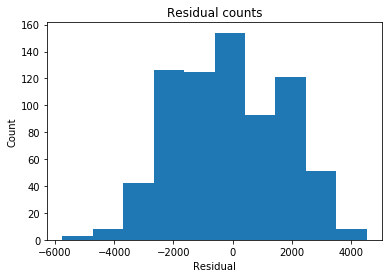

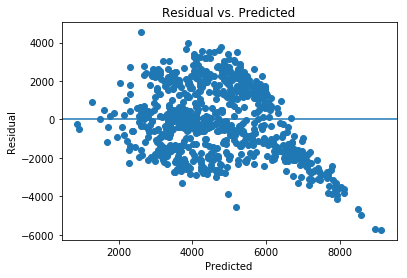

In [92]:
# OLS

ols = linear_model.LinearRegression()
X = df[['atemp', 'windspeed', 'weathersit','hum']]
Y = df['cnt']
ols.fit(X, Y)
# Inspect the results.
print('\nR-squared:')
print(ols.score(X, Y))
predicted = cross_val_predict(ols, X, Y, cv=5).ravel()


actual = df['cnt']
residual = actual - predicted

#Plot residual - should be close to normal
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#check scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

[0.49246967 0.55926516 0.56321991 0.5634095  0.56818895 0.43950874
 0.46702214 0.3312194  0.55403244 0.54870822]
0.50870441590961


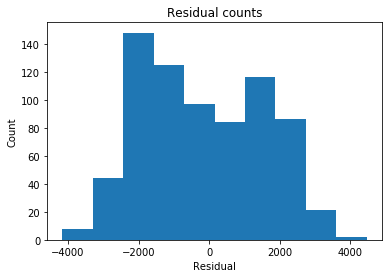

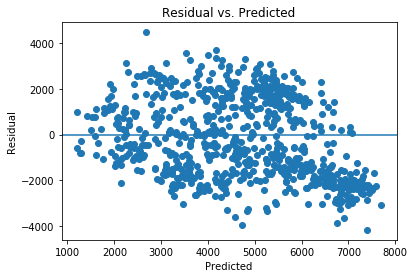

In [95]:
#TEST The KNN regression with no weighting, 8 neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=8)
X = df[['atemp', 'windspeed', 'weathersit','hum']].astype('float')
Y = df['cnt']
knn.fit(X, Y)
cv = ShuffleSplit(test_size=0.1)
score_knn = cross_val_score(knn, X, Y, cv=cv)
print(score_knn)
print(score_knn.mean())
predicted = cross_val_predict(knn,X,Y, cv=5).ravel()
actual = df['cnt']
residual = actual - predicted
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#check scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


[0.45472444 0.48702776 0.47279844 0.46120225 0.57351936 0.57385301
 0.50061264 0.42681536 0.44592177 0.40637896]
0.4802853982910443


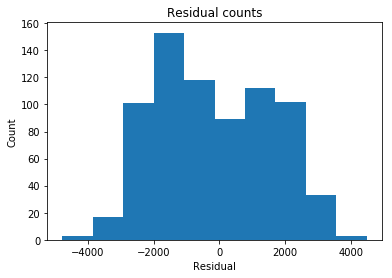

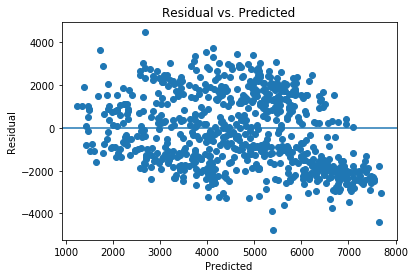

In [96]:
#Test the KNN regression with distance weighting, 9 neighbors

knn_dist = neighbors.KNeighborsRegressor(n_neighbors=9, weights='distance')
X = df[['atemp', 'windspeed','hum']]
Y = df['cnt']
knn_dist.fit(X, Y)
cv = ShuffleSplit(test_size=0.1)
score_knn = cross_val_score(knn_dist, X, Y, cv=cv)
print(score_knn)
print(score_knn.mean())
predicted = cross_val_predict(knn_dist,X,Y, cv=5).ravel()

actual = df['cnt']
residual = actual - predicted
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#check scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In this case, the KNN model is better in a few ways:
* Better R-squared score: KNN appears to be explaining the variance better
* Better scedasticity: The OLS model consistently under-predicted larger values, implying that the it's really only valid for a small range nearer to the mean. KNN, on the other hand, can make valid predictions  along the whole range of potential values

The distribution of the temperatures recorded was not normal, and that really influenced the usefuleness of this model. Both types had very small residuals, and 2 peaks in their residual distributions, which can be traced back to the same dynamic in temperatures observed (few near the mean, but a lot just above or below it). 

If the outcome variable varied less overall, I think OLS might have been better to predict within the reduced range out outcomes, but with the spread observed here, KNN was better. 